In [83]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn import tree
%matplotlib inline

In [84]:
data=pd.read_table('LR-testSet2.txt',sep=',',header=None,encoding="gb2312")
print(data)

            0         1  2
0    0.051267  0.699560  1
1   -0.092742  0.684940  1
2   -0.213710  0.692250  1
3   -0.375000  0.502190  1
4   -0.513250  0.465640  1
5   -0.524770  0.209800  1
6   -0.398040  0.034357  1
7   -0.305880 -0.192250  1
8    0.016705 -0.404240  1
9    0.131910 -0.513890  1
10   0.385370 -0.565060  1
11   0.529380 -0.521200  1
12   0.638820 -0.243420  1
13   0.736750 -0.184940  1
14   0.546660  0.487570  1
15   0.322000  0.582600  1
16   0.166470  0.538740  1
17  -0.046659  0.816520  1
18  -0.173390  0.699560  1
19  -0.478690  0.633770  1
20  -0.605410  0.597220  1
21  -0.628460  0.334060  1
22  -0.593890  0.005117  1
23  -0.421080 -0.272660  1
24  -0.115780 -0.396930  1
25   0.201040 -0.601610  1
26   0.466010 -0.535820  1
27   0.673390 -0.535820  1
28  -0.138820  0.546050  1
29  -0.294350  0.779970  1
..        ...       ... ..
88  -0.403800  0.706870  0
89  -0.380760  0.918860  0
90  -0.507490  0.904240  0
91  -0.547810  0.706870  0
92   0.103110  0.779970  0
9

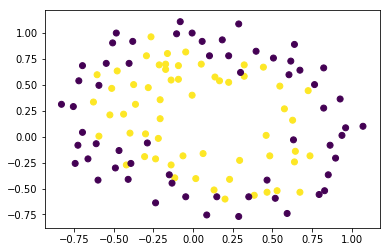

In [85]:
x_data=data.iloc[:,:-1]
y_data=data.iloc[:,-1]
plt.scatter(x_data.iloc[:,0],x_data.iloc[:,1],c=y_data)



In [86]:
x_train,x_test,y_train,y_test=train_test_split(x_data,y_data)

In [87]:
model=tree.DecisionTreeClassifier(max_depth=7,min_samples_split=4)#min_samples_split 最小节点划分数
model.fit(x_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=7,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=4,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [88]:
import graphviz

In [89]:
dot_data=tree.export_graphviz(model,
                              out_file=None,
                              feature_names=['x','y'],
                              class_names=['label0','label1'],
                              filled=True,
                              rounded=True,
                              special_characters=True
                             )

In [90]:
graph=graphviz.Source(dot_data)
graph.render('cart')

'cart.pdf'

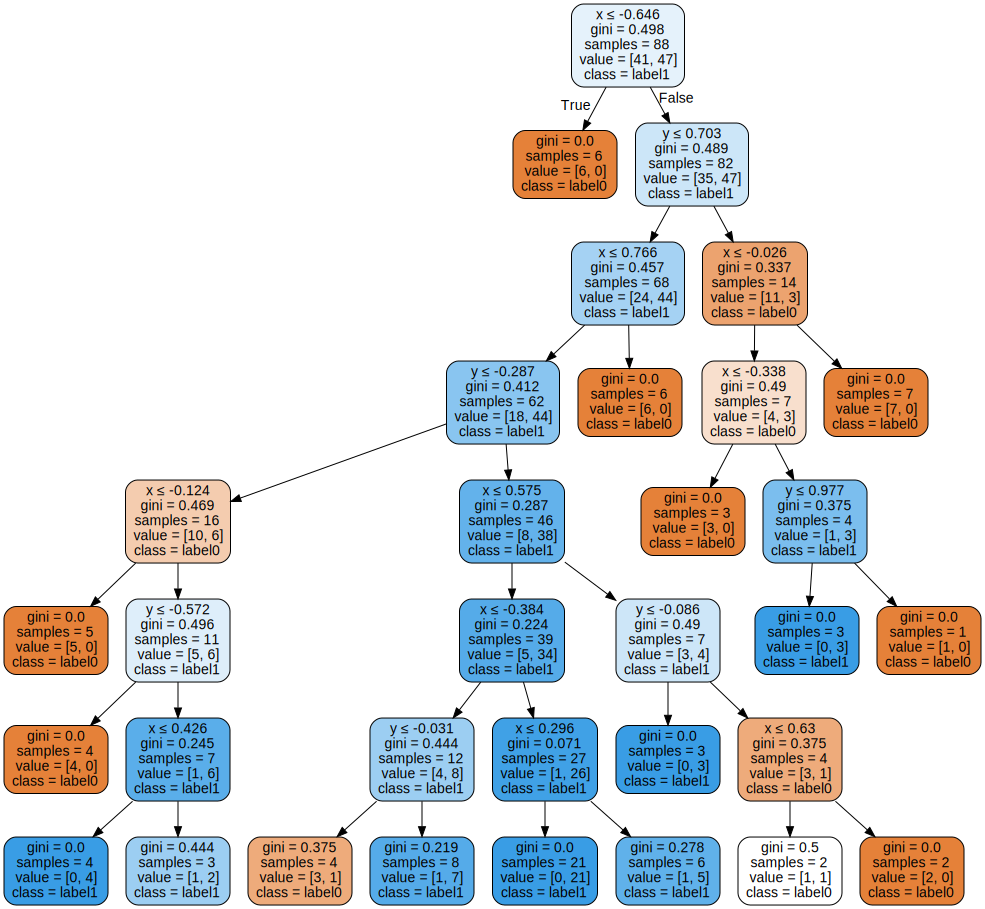

In [91]:
graph

In [92]:
x_min,x_max=x_data.values[:,0].min()-1,x_data.values[:,0].max()+1
y_min,y_max=x_data.values[:,1].min()-1,x_data.values[:,1].max()+1

In [93]:
xx,yy=np.meshgrid(np.arange(x_min,x_max,0.02),
                  np.arange(y_min,y_max,0.02)
                 )

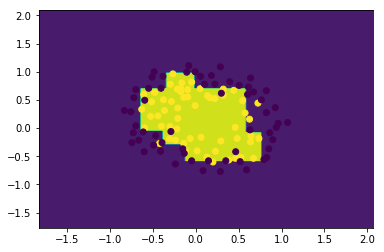

In [94]:
z=model.predict(np.c_[xx.ravel(),yy.ravel()])
z=z.reshape(xx.shape)
cs=plt.contourf(xx,yy,z)
plt.scatter(x_data.iloc[:,0],x_data.iloc[:,1],c=y_data)

In [95]:
predictions=model.predict(x_train)
print(classification_report(predictions,y_train))

             precision    recall  f1-score   support

          0       0.93      0.95      0.94        40
          1       0.96      0.94      0.95        48

avg / total       0.94      0.94      0.94        88



In [96]:
predictions=model.predict(x_test)
print(classification_report(predictions,y_test))

             precision    recall  f1-score   support

          0       0.95      0.90      0.92        20
          1       0.82      0.90      0.86        10

avg / total       0.90      0.90      0.90        30



In [72]:
#发生过拟合问题